In [1]:
"""
    Lesson 1
    Worked on in connection with O'Reilly NLP course w.safaribooksonline.com/videos/natural-language-processing
    
    Below code reproduced manually from here https://github.com/bmtgoncalves/FromScratch/blob/master/NLP/NLP%20Lesson%201.ipynb
    with my own additions/subtractions/comments
"""

import string
from collections import Counter
from pprint import pprint
import gzip
import matplotlib.pyplot as plt 
import numpy as np

%matplotlib inline


text = """Mary had a little lamb, little lamb,
    little lamb. Mary had a little lamb
    whose fleece was white as snow.
    And everywhere that Mary went
    Mary went, Mary went. Everywhere
    that Mary went,
    The lamb was sure to go"""


In [2]:
# normalize words from the text
def extract_words(text):
    temp = text.split()
    text_words = []
    
    # Get rid of punctuation and downcase each word
    for word in temp:
        while word[0] in string.punctuation:
            word = word[1:]
            
        while word[-1] in string.punctuation:
            word = word[:-1]
        
        text_words.append(word.lower())
    
    return text_words

In [3]:
text_words = extract_words(text)

# key: word, value: unique word_id
word_dict = {}
# list of unique words from text_words
word_list = []
# list of word_ids in order as words appear in text_words
text_tokens = []
# counter to generate word_ids
word_id = 0

"""
    take each tokenized word and 1) add it to the
    word_dict and unique word_list if not already
    there (i.e., no word repeats) and 2) append 
    it's word_id to the text_tokens list
    (i.e., repeats ok)
"""
for word in text_words:
    if word not in word_dict:
        word_dict[word] = word_id
        word_list.append(word)
        word_id += 1
    
    text_tokens.append(word_dict[word])
    

In [4]:
print(word_dict)

# tokenized version of text
print(text_tokens)

{'mary': 0, 'had': 1, 'a': 2, 'little': 3, 'lamb': 4, 'whose': 5, 'fleece': 6, 'was': 7, 'white': 8, 'as': 9, 'snow': 10, 'and': 11, 'everywhere': 12, 'that': 13, 'went': 14, 'the': 15, 'sure': 16, 'to': 17, 'go': 18}
[0, 1, 2, 3, 4, 3, 4, 3, 4, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 0, 14, 0, 14, 0, 14, 12, 13, 0, 14, 15, 4, 7, 16, 17, 18]


In [5]:

"""
    ONE_HOT ENCODING
    This isn't super useful. We don't know enough about the words 
    when we represent them with a single int.
    Use one-hot encoding instead. Generate a unique vector for each word,
    where 1 appears once at an index in the vector unique to that word.
"""

def one_hot(word, word_dict=word_dict):
    # generate an np vector of all zeros
    vector = np.zeros(len(word_dict))
    # flip 0 to 1 at the index where the word's word_id is
    vector[word_dict[word]] = 1
    return vector

# one_hot definitions of 'mary' and 'fleece'
print(one_hot('mary'))
print(one_hot('fleece'))
print(one_hot('mary') + one_hot('fleece'))

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [20]:

"""
    BAG OF WORDS
    One-hot vectorization works ok above because relatively small
    dictionary of words. If we were attempting to one-hot vectorize
    the entire english language, we'd have a vector space of a million
    which wouldn't be efficient. We'd have a vector with lenght a million
    or so for each word, and only one value would be flipped to 1. A waste
    of zeros, basically.
    
    Bag of words: Just keep track of words you are using in text. Use a
    dictionary with key word and value how many times word appears. You lose
    the word order but get rid of all the vector wasted 0s.
"""

text_vector = np.zeros(word_id)

for word in text_words:
    # count no. of times word appears by adding
    # 1 to vector position at word_index
    text_vector[word_dict[word]] += 1
    
print(text_vector)

[6. 2. 2. 4. 5. 1. 1. 2. 1. 1. 1. 1. 2. 2. 4. 1. 1. 1. 1.]


In [7]:
# 'mary' is at word_index 0. Looks like she appears 6 times.
# Confirm: How many times does 'mary' appear?
print(text_vector[word_dict['mary']])

NameError: name 'text_vector' is not defined

In [8]:
# Do the same thin use the python Counter module
word_counts = Counter(text_words)
pprint(word_counts)

Counter({'mary': 6,
         'lamb': 5,
         'little': 4,
         'went': 4,
         'had': 2,
         'a': 2,
         'was': 2,
         'everywhere': 2,
         'that': 2,
         'whose': 1,
         'fleece': 1,
         'white': 1,
         'as': 1,
         'snow': 1,
         'and': 1,
         'the': 1,
         'sure': 1,
         'to': 1,
         'go': 1})


In [9]:
"""
    STOP WORDS
    Words that carry little meaning and can be discarded
    "the", "and", "a", etc
    Often occur frequently, but not always so can't just throw
    words out based on frequency
    Usually use manually curated list of words created by linguists
"""

# get list of items [(key, value),...] from word_count above and sort by frequency descending
items = list(word_counts.items())
sorted(items, key=lambda x:x[1], reverse=True)

# Not easy to draw conclusions from above small piece of text
# import the first 100 MB of the english Wikipedia from: http://mattmahoney.net/dc/textdata

data = []

for line in gzip.open("data/text8.gz", 'rt'):
    data.extend(line.strip().split())

In [10]:
# count and sort the wikipedia data
counts = Counter(data)
sorted_counts = sorted(list(counts.items()), key=lambda x:x[1], reverse=True)

# print the top 10 works. Note that they aren't particularly interesting or useful.
for word, count in sorted_counts[:10]:
    print(word, count)


the 1061396
of 593677
and 416629
one 411764
in 372201
a 325873
to 316376
zero 264975
nine 250430
two 192644


Text(0.5,1,'Word frequency distribution')

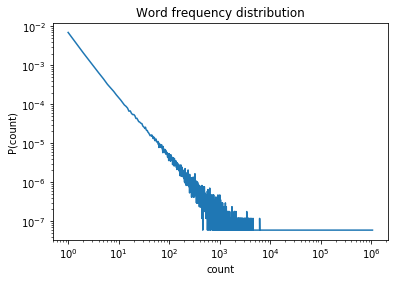

In [11]:
# plot word frequency distribution
# Note that a lot of words are used infrequently (upper left)
# and a fiew words are used very frequency (lower right)
# and everything else clumps in the middle
dist = Counter(counts.values())
dist = list(dist.items())
dist.sort(key=lambda x:x[0])
dist = np.array(dist)

norm = np.dot(dist.T[0], dist.T[1])

plt.loglog(dist.T[0], dist.T[1]/norm)
plt.xlabel("count")
plt.ylabel("P(count)")
plt.title("Word frequency distribution")

In [12]:
# Let's trying setting the top 100 most frequently used words
# as stop words and removing them. In real life we would use
# a curated list of words, but this will do for the example.

stopwords = set([word for word, count in sorted_counts[:100]])
clean_data = []

for word in data:
    if word not in stopwords:
        clean_data.append(word)

# we get rid of a lot of words--almost half
print("Original size:", len(data))
print("Clean size:", len(clean_data))
print("Reduction %:", (1-len(clean_data)/len(data)) * 100)

Original size: 17005207
Clean size: 9006229
Reduction %: 47.0384041782026


In [13]:
"""
    TF/IDF
    
    TF: Term Frequency (number of times word appears).
        After removal of stop words (not meaningufl),
        TF is a good indicator of what words are
        important/meaningful in a document
    IDF: Inverse Document Frequency (how unusual it is for a document
        to contain a certain word). This let's you compare a word ACROSS
        documents, the idea being the more often a word appears across
        documents, the less meaningful it is to a specific document
    
    TF and IDF are sort of inverses. In TF, the most frequent word is most
    meaningful to a doc. In IDF, the least frequent word is most 
    meaningful to a doc b/c it let's you distinguist it from other docs.
    
    TF and IDF each have different ways you can calculate them mathematically,
    but not matter which you use TF-IDF is TF * IDF. High TF = important to 
    specific doc, and HIGH IDF (aka LOW DF) equals uncommon in entire corpus of docs.
    
    TF-IDF gives you a balance of term frequency and inverse doc frequency.
    
    One way to find stop words would be to look for words with high TF and low IDF.
"""

# start with our nursery rhyme again. Split it into four sentences.
# Pretend each sentence is its own document.
corpus_text = text.split('.')
corpus_words = []

for document in corpus_text:
    doc_words = extract_words(document)
    corpus_words.append(doc_words)
    
print(corpus_words)

[['mary', 'had', 'a', 'little', 'lamb', 'little', 'lamb', 'little', 'lamb'], ['mary', 'had', 'a', 'little', 'lamb', 'whose', 'fleece', 'was', 'white', 'as', 'snow'], ['and', 'everywhere', 'that', 'mary', 'went', 'mary', 'went', 'mary', 'went'], ['everywhere', 'that', 'mary', 'went', 'the', 'lamb', 'was', 'sure', 'to', 'go']]


In [14]:
# calculate the number of documents in which each word appears
document_count = {}

for document in corpus_words:
    word_set = set(document)
    
    for word in word_set:
        document_count[word] = document_count.get(word, 0) + 1

pprint(document_count)

{'a': 2,
 'and': 1,
 'as': 1,
 'everywhere': 2,
 'fleece': 1,
 'go': 1,
 'had': 2,
 'lamb': 3,
 'little': 2,
 'mary': 4,
 'snow': 1,
 'sure': 1,
 'that': 2,
 'the': 1,
 'to': 1,
 'was': 2,
 'went': 2,
 'white': 1,
 'whose': 1}


In [15]:
# 'mary' appears in all 4 documents. So, it's pretty useless to use to
# distinguish between the documents.
pprint(document_count['mary'])

4


In [16]:
# 'go' appears in just 1 document, that's good!
pprint(document_count['go'])

1


In [17]:
# now calculate IDF
# as an aside, I don't know why this guy keeps
# passing these globals in as arguments, going to make
# them defaults
def inv_doc_freq(corpus_words=corpus_words):
    number_docs = len(corpus_words)
    document_count = {}
    
    for document in corpus_words:
        word_set = set(document)
        
        for word in word_set:
            document_count[word] = document_count.get(word, 0) + 1
    
    IDF = {}
    
    for word in document_count:
        # log of total docs / number of docs word appears in
        # use log to avoid handling small fractional numbers.
        IDF[word] = np.log(number_docs/document_count[word])
        
    return IDF


In [18]:
# note that IDF gives a smaller weight to most common words
# From the guy teaching this:
# "As expected Mary has the smallest weight of all words 0, 
# meaning that it is effectively removed from the dataset.
# You can consider this as a way of implicitly identify and remove
# stopwords. In case you do want to keep even the words that appear
# in every document, you can just add a 1. to the argument of the
# logarithm above"
pprint(inv_doc_freq())

{'a': 0.6931471805599453,
 'and': 1.3862943611198906,
 'as': 1.3862943611198906,
 'everywhere': 0.6931471805599453,
 'fleece': 1.3862943611198906,
 'go': 1.3862943611198906,
 'had': 0.6931471805599453,
 'lamb': 0.28768207245178085,
 'little': 0.6931471805599453,
 'mary': 0.0,
 'snow': 1.3862943611198906,
 'sure': 1.3862943611198906,
 'that': 0.6931471805599453,
 'the': 1.3862943611198906,
 'to': 1.3862943611198906,
 'was': 0.6931471805599453,
 'went': 0.6931471805599453,
 'white': 1.3862943611198906,
 'whose': 1.3862943611198906}


In [19]:
# Multiply TF by IDF to see how relevant a word is to a doc

def tf_idf(corpus_words):
    IDF = inv_doc_freq(corpus_words)
    
    TFIDF = []
    
    for document in corpus_words:
        TFIDF.append(Counter(document))
    
    for document in TFIDF:
        for word in document:
            document[word] = document[word]*IDF[word]
            
    return TFIDF

tf_idf(corpus_words)

# Paraphrasing: now have a vector representation of each of our documents.
# Each vector is a unique representation of each document in the
# corpus making it posssible to define the similarity of two documents, etc.

# 'mary' has a weight of 0 as expected because it appears in every document.
# 'little' has the strongest wait in the first document, etc.

[Counter({'mary': 0.0,
          'had': 0.6931471805599453,
          'a': 0.6931471805599453,
          'little': 2.0794415416798357,
          'lamb': 0.8630462173553426}),
 Counter({'mary': 0.0,
          'had': 0.6931471805599453,
          'a': 0.6931471805599453,
          'little': 0.6931471805599453,
          'lamb': 0.28768207245178085,
          'whose': 1.3862943611198906,
          'fleece': 1.3862943611198906,
          'was': 0.6931471805599453,
          'white': 1.3862943611198906,
          'as': 1.3862943611198906,
          'snow': 1.3862943611198906}),
 Counter({'and': 1.3862943611198906,
          'everywhere': 0.6931471805599453,
          'that': 0.6931471805599453,
          'mary': 0.0,
          'went': 2.0794415416798357}),
 Counter({'everywhere': 0.6931471805599453,
          'that': 0.6931471805599453,
          'mary': 0.0,
          'went': 0.6931471805599453,
          'the': 1.3862943611198906,
          'lamb': 0.28768207245178085,
          'was': 0.

In [ ]:
"""
    STEMMING
    
    Finding the root, or stem, of a word to identify similar words and further reduce
    number of words we need to consider (i.e., treat similar words as one word)
"""